In [19]:
import os, torch
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff
%matplotlib inline

In [23]:
m = leafmap.Map(center=[37.8713, -122.2580], zoom=17, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[37.8713, -122.258], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [13]:
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [-122.2659, 37.8682, -122.2521, 37.8741]

In [14]:
image = "satellite.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=17, source="Satellite", overwrite=True)

Downloaded image 01/24
Downloaded image 02/24
Downloaded image 03/24
Downloaded image 04/24
Downloaded image 05/24
Downloaded image 06/24
Downloaded image 07/24
Downloaded image 08/24
Downloaded image 09/24
Downloaded image 10/24
Downloaded image 11/24
Downloaded image 12/24
Downloaded image 13/24
Downloaded image 14/24
Downloaded image 15/24
Downloaded image 16/24
Downloaded image 17/24
Downloaded image 18/24
Downloaded image 19/24
Downloaded image 20/24
Downloaded image 21/24
Downloaded image 22/24
Downloaded image 23/24
Downloaded image 24/24
Saving GeoTIFF. Please wait...
Image saved to satellite.tif


In [24]:
m.layers[-1].visible = False
m.add_raster(image, layer_name="Image")
m

Map(bottom=12958516.0, center=[37.8713, -122.258], controls=(ZoomControl(options=['position', 'zoom_in_text', …

In [16]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=None,
)

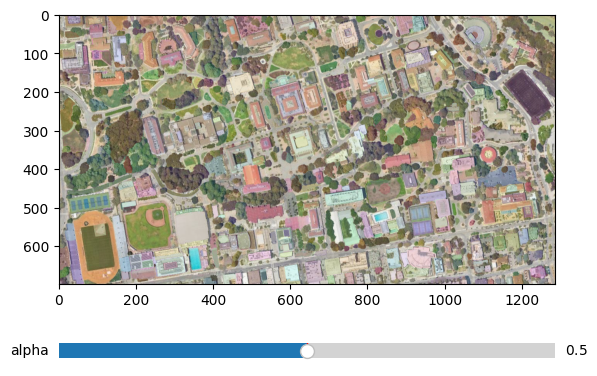

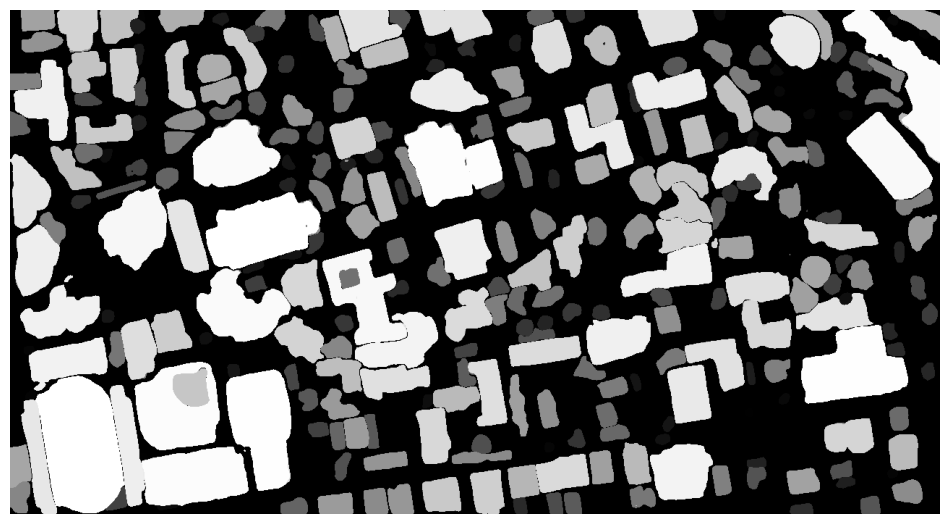


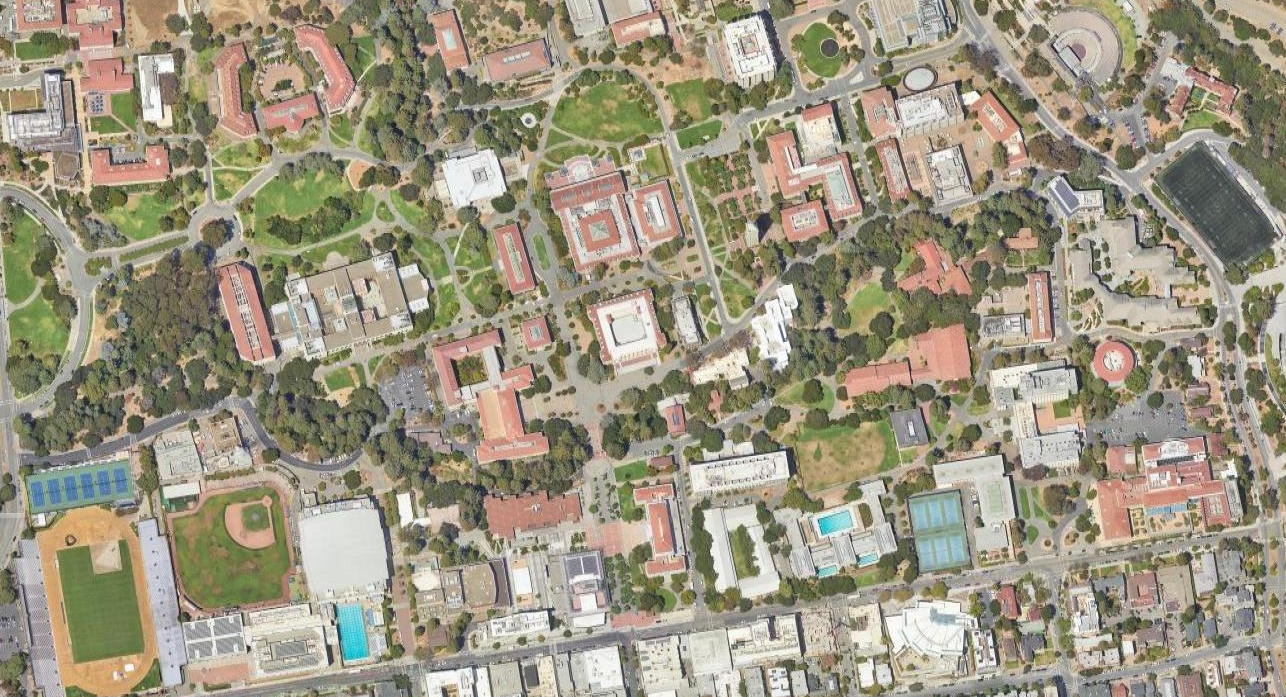
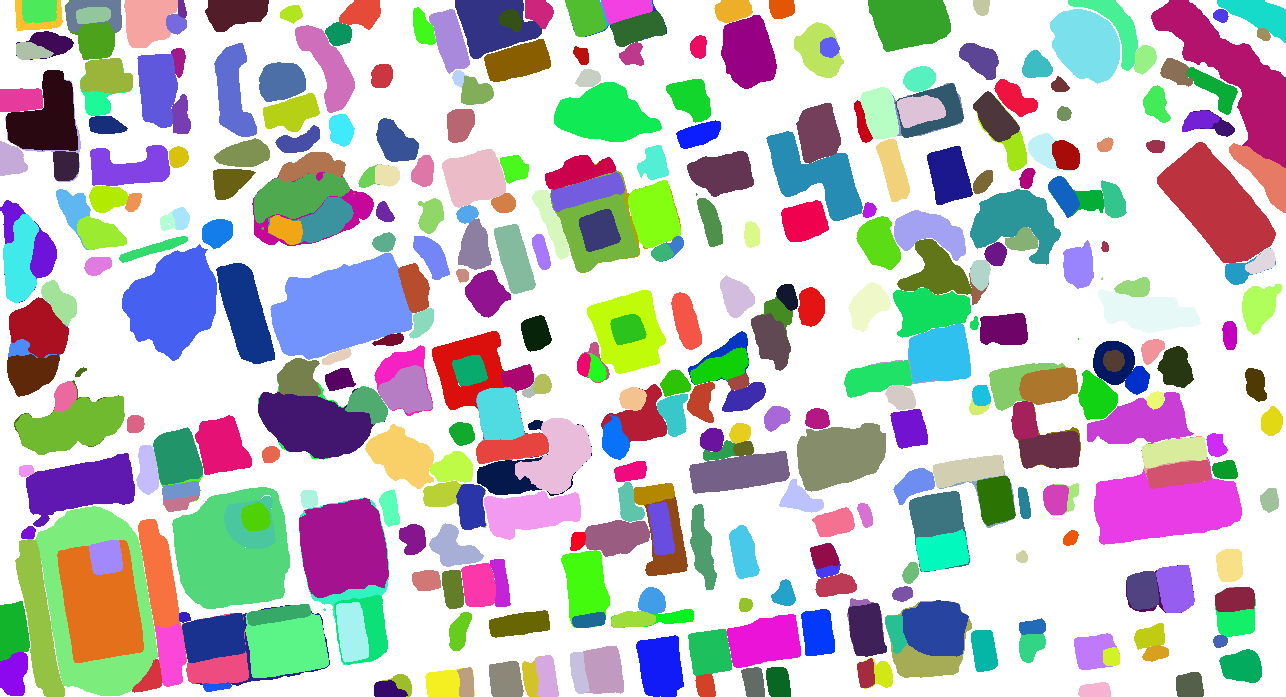

Map(bottom=6479467.0, center=[37.87115, -122.259], controls=(ZoomControl(options=['position', 'zoom_in_text', …

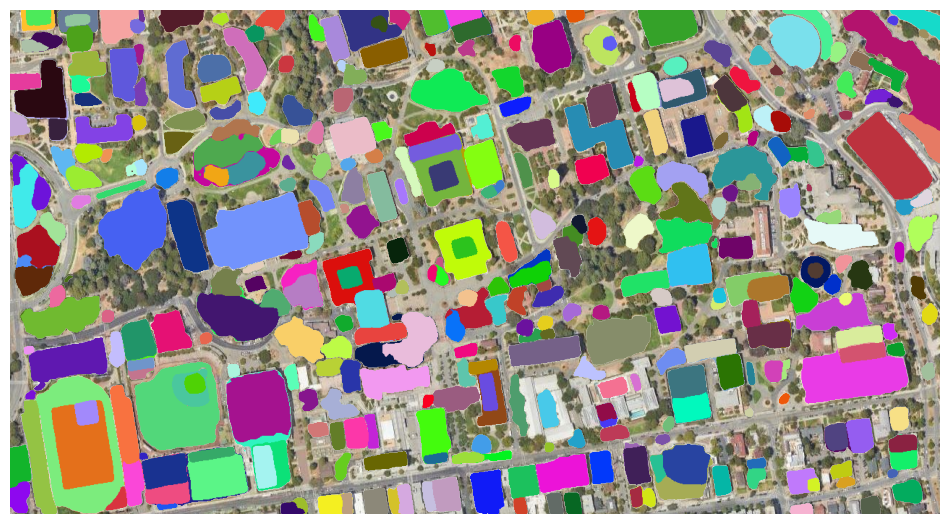

In [17]:
sam.generate(image, output="masks.tif", foreground=True, unique=True)
sam.show_masks(cmap="binary_r")
sam.show_anns(axis="off", alpha=1, output="annotations.tif")
leafmap.image_comparison(
    "satellite.tif",
    "annotations.tif",
    label1="Satellite Image",
    label2="Image Segmentation",
)
m.add_raster("annotations.tif", alpha=0.5, layer_name="Masks")
m

In [20]:
sam.tiff_to_vector("masks.tif", "masks.gpkg")
torch.cuda.empty_cache()

In [21]:
sam_kwargs = {
    "points_per_side": 32,
    "pred_iou_thresh": 0.86,
    "stability_score_thresh": 0.92,
    "crop_n_layers": 1,
    "crop_n_points_downscale_factor": 2,
    "min_mask_region_area": 100,
}
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=sam_kwargs,
)
sam.generate(image, output="masks2.tif", foreground=True)

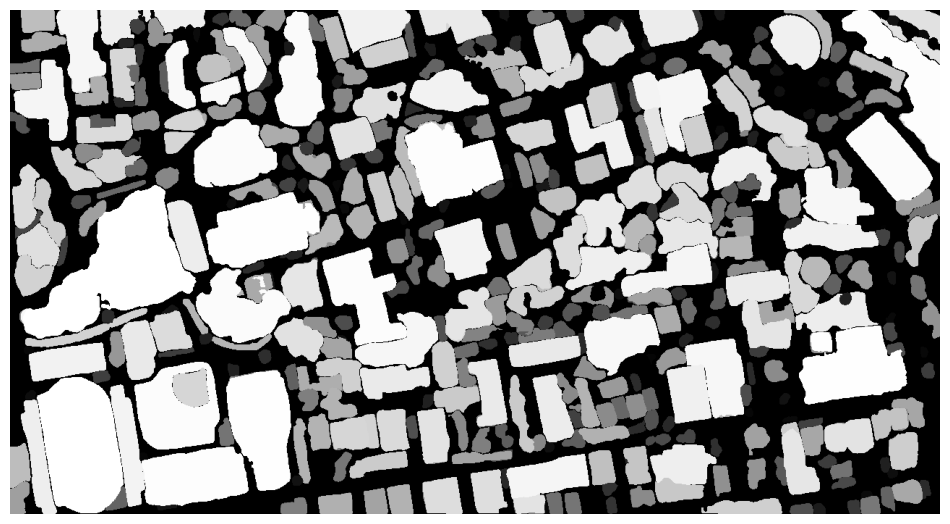


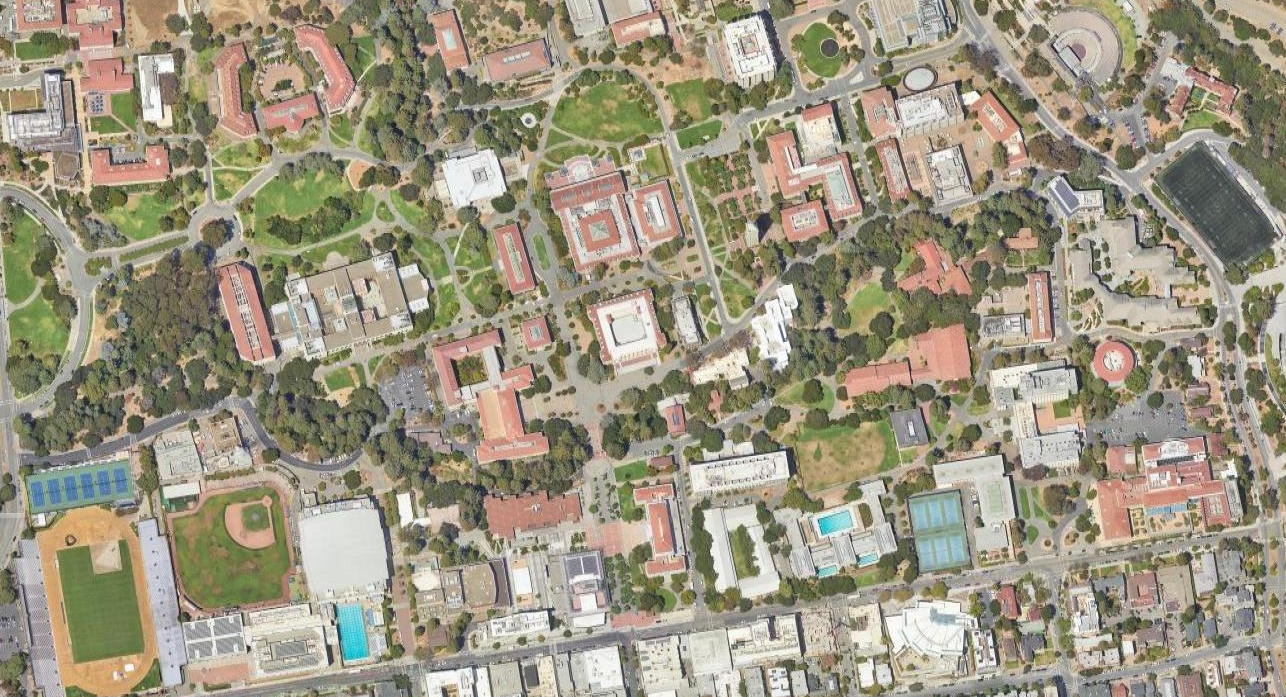
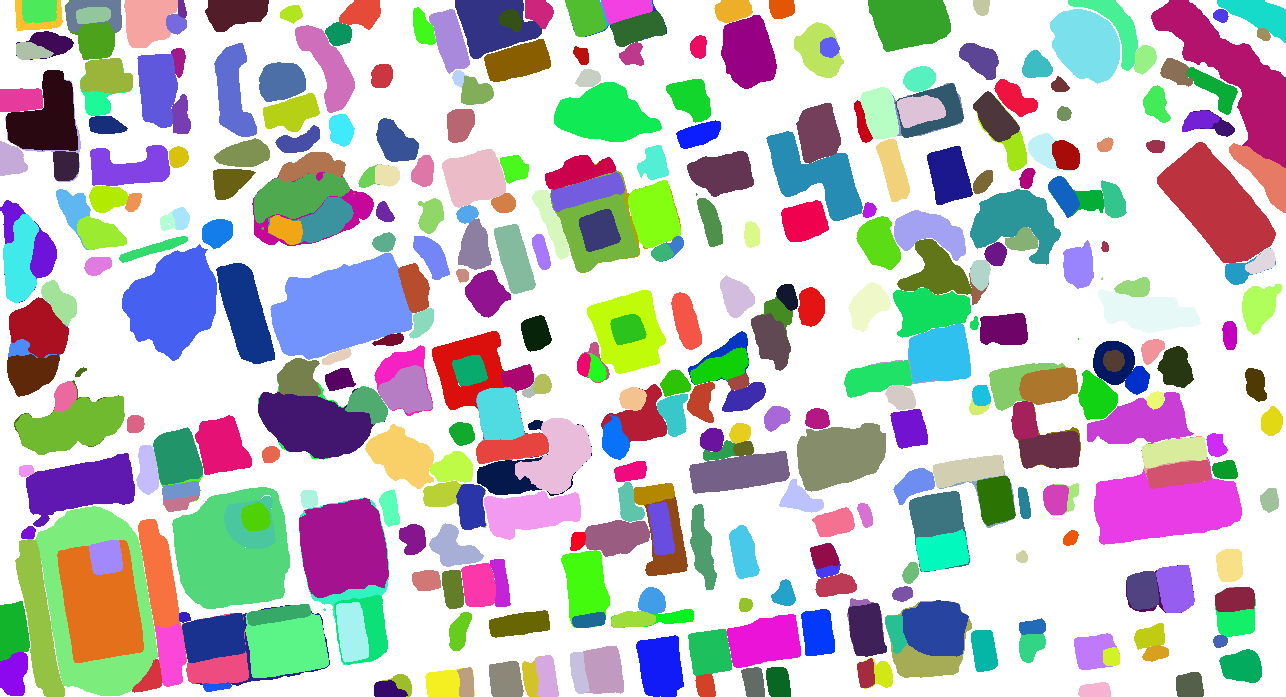

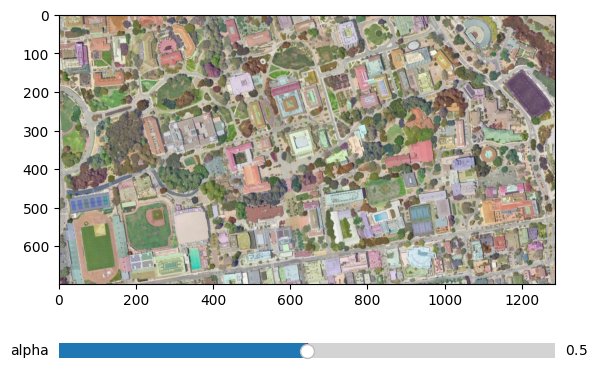

In [22]:
sam.show_masks(cmap="binary_r")
sam.show_anns(axis="off", opacity=1, output="annotations2.tif")
leafmap.image_comparison(
    image,
    "annotations.tif",
    label1="Image",
    label2="Image Segmentation",
)
overlay_images(image, "annotations2.tif", backend="TkAgg")